# Аттрактор Лоренца

##  Задача №1. Простое решение

<br>
<font size=4> 
Система
</font>
<br>
<br>
$
\Large
\begin{cases}
   \dot{x} = \sigma (y - x), 
   \\
   \dot{y} = x (\rho - z) - y,
   \\
   \dot{z} = x y - \beta z
 \end{cases}\normalsize
 $
<br>
<font size=4> 
Стандартные значения - $\sigma=10, \rho=28, \beta=2.667$
</font>
<br>

__Требования__:
- Не использовать интеграторы и массивы numpy, точки высчитывать в цикле
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Подписать рисунок и оси
- label со значениями $\sigma=10, \rho=28, \beta=2.667$


##  Задача №2. Чуть сложнее

Аттрактор Лоренца, но другие требования:

- Использовать numpy массивы, не использовать интегрирование из scipy
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем
    - `lorenz(x, y, z)` считает производные при стандартных значениях $\sigma=10, \rho=28, \beta=2.667$
    - если нужны другие значения $\sigma, \rho, \beta$, то вызывать можно только как `lorenz(x, y, z, sigma=..., beta=..., rho=...)`
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

##  Задача №3. Сложнее, но короче

Аттрактор Лоренца, но требования опять поменялись:

- Использовать numpy массивы и интегрирование из scipy (odeint)
- Начальные данные - $(0., 1., 1.01)$
- Временной интервал - $0...100$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем первый аргумент - кортеж из трех точек; остальное - как в _задаче №2_ (может что-то ещё понадобится, посмотрите сигнатуру `odeint`)
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

## Задача №4

Поместите три написанные функции в собственный пакет

In [4]:
%%writefile lorenz_pkg/lorenz.py
'''
Пакет для построения аттрактора Лоренца
Пакет содержит три фунцкии для построения аттрактора:
lorenz_simple не использует массивы numpy и интегрирование из scipy
lorenz_harder использует массивы numpy, но не использует интегрирование из scipy
lorenz_hard использует массивы numpy и интегрирование из scipy
Вспомогательная функция __lorenz считает значение в очередной точке
Вспомогательная функция __draw строит график
'''

from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

n = 10000

def __lorenz(xyz, time, sigma = 10, ro = 28, beta = 2.667):
    x, y, z = xyz
    return sigma * (y - x), x * (ro - z) - y, x * y - beta * z

def __draw(xx, yy, zz, sigma, ro, beta):
    axes = Axes3D(plt.figure())
    axes.plot(xx, yy, zz)
    axes.set_xlabel("X")
    axes.set_ylabel("Y")
    axes.set_zlabel("Z")
    plt.title('Аттрактор Лоренца при ' + r'$\sigma$ = ' + str(sigma) + r', $\rho$ = ' + str(ro) + r', $\beta$ = ' + str(beta))
    plt.show();

def lorenz_simple(x0, y0, z0, sigma = 10, ro = 28, beta = 2.667):
    xx = [0] * n
    yy = [0] * n
    zz = [0] * n
    xx[0], yy[0], zz[0] = x0, y0, z0
    for i in range(n - 1):
        xx[i + 1] = xx[i] + sigma * (yy[i] - xx[i]) * 0.01
        yy[i + 1] = yy[i] + (xx[i] * (ro - zz[i]) - yy[i]) * 0.01
        zz[i + 1] = zz[i] + (xx[i] * yy[i] - beta * zz[i]) * 0.01
    __draw(xx, yy, zz, sigma, ro, beta)
    
def lorenz_harder(x0, y0, z0, sigma = 10, ro = 28, beta = 2.667):
    xx, yy, zz = np.empty(n), np.empty(n), np.empty(n)
    xx[0], yy[0], zz[0] = x0, y0, z0
    for i in range(n - 1):
        x, y, z = __lorenz((xx[i], yy[i], zz[i]), None)
        xx[i + 1] = xx[i] + x * 0.01
        yy[i + 1] = yy[i] + y * 0.01
        zz[i + 1] = zz[i] + z * 0.01
    __draw(xx, yy, zz, sigma, ro, beta)
    
def lorenz_hard(x0, y0, z0, sigma = 10, ro = 28, beta = 2.667):
    xx, yy, zz = odeint(__lorenz, (x0, y0, z0), np.linspace(0, 100, n), args = (sigma, ro, beta))
    __draw(xx, yy, zz, sigma, ro, beta)

Overwriting lorenz_pkg/lorenz.py



Пакет для построения аттрактора Лоренца
Пакет содержит три фунцкии для построения аттрактора:
lorenz_simple не использует массивы numpy и интегрирование из scipy
lorenz_harder использует массивы numpy, но не использует интегрирование из scipy
lorenz_hard использует массивы numpy и интегрирование из scipy
Вспомогательная функция __lorenz считает значение в очередной точке
Вспомогательная функция __draw строит график



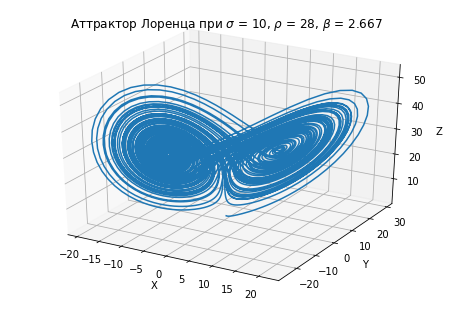

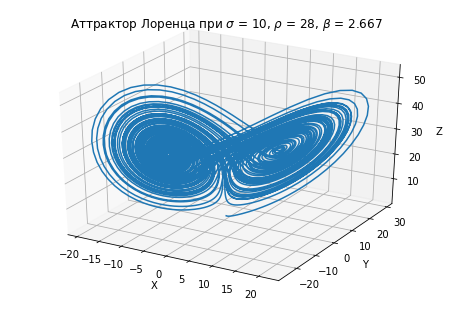

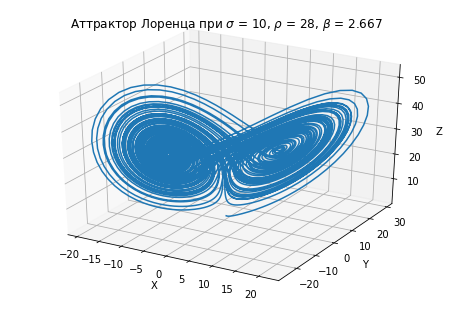

In [5]:
import lorenz_pkg.lorenz as lorenz

print(lorenz.__doc__)
lorenz.lorenz_simple(0., 1., 1.01)
lorenz.lorenz_harder(0., 1., 1.01)
lorenz.lorenz_harder(0., 1., 1.01)

##  Задача №5. Опциональная

Сравните скорости выполнения написанных функций

In [ ]:
import lorenz_pkg.lorenz as lorenz

%timeit lorenz.lorenz_simple(0., 1., 1.01)
%timeit lorenz.lorenz_harder(0., 1., 1.01)
%timeit lorenz.lorenz_harder(0., 1., 1.01)

Результат:
lorenz_simple time: 185 ms ± 4.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
lorenz_harder time: 209 ms ± 8.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
lorenz_hard time: 205 ms ± 6.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

## Задача №6

- сгенерируйте список чисел от 1 до произвольного числа $n$ от 5 до 9 включительно
- сделайте из него массив numpy
- сгенерируйте случайное число $m$ от 2 до 4 включительно
- верните массив numpy в следующей формы: $[1, 0, ..., 0, 2, 0, ..., 0, 3, ... , n, 0, ... , 0]$, где количество нулей между числами равно $m$
- преобразуйте полученный массив в двумерный массив так, чтобы в первом столбце были числа $1,2, ... , n$, остальные - $0$

In [6]:
import random
import numpy as np

In [7]:
n = random.randint(5, 9)
list = [i for i in range(1, n + 1)]
print('n =', n)
print(list)

n = 8
[1, 2, 3, 4, 5, 6, 7, 8]


In [8]:
array_from_list = np.array(list)
print(array_from_list)

[1 2 3 4 5 6 7 8]


In [9]:
m = random.randint(2, 4)
print(m)

4


In [10]:
array_with_zeros = np.zeros(len(array_from_list) * (m + 1), dtype = int)
array_with_zeros[ : : m + 1] = array_from_list
print(array_with_zeros)

[1 0 0 0 0 2 0 0 0 0 3 0 0 0 0 4 0 0 0 0 5 0 0 0 0 6 0 0 0 0 7 0 0 0 0 8 0
 0 0 0]


In [11]:
array_reshaped = array_with_zeros.reshape(n, m + 1)
print(array_reshaped)

[[1 0 0 0 0]
 [2 0 0 0 0]
 [3 0 0 0 0]
 [4 0 0 0 0]
 [5 0 0 0 0]
 [6 0 0 0 0]
 [7 0 0 0 0]
 [8 0 0 0 0]]
